<h1 align='center' style='color:purple'>Sonar - Mines vs Rocks</h1>


The focus of this project will be the Sonar Mines vs Rocks dataset. The problem is to predict metal or rock objects from sonar return data. The file "Sonar_Mines_vs_Rocks.csv" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.




We are going to cover the following steps:

* Loading Necessary Libraries
* Read and Analyze the dataset
* Visualize the dataset 
* Prepare Data
* Model and Evaluate Algorithms
* Improve Accuracy or Results
* Finalize Model 

Goal: Predict metal or rock objects from sonar return data


To start, we downloaded the dataset from the UCI website (http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)#:~:text=Data%20Set%20Information%3A,from%20rocks%20under%20similar%20conditions.) and loaded to MySQL.

## Loading Necessary Libraries

In [1]:
# Load libraries
from pandasql import sqldf
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import joblib
import pickle5

# from pickle import dump
# from pickle import load
from datetime import datetime
from numpy import set_printoptions
pd.set_option('display.width', 100)
pd.set_option('precision', 5)

## Read and Analyze the dataset

In [2]:
columns = ['Angle_'+str(i) for i in range(1,61)]
columns.append('Result')

df = pd.read_csv('Sonar_Mines_vs_Rocks.csv', header = 0, names = columns)

In [3]:
#Dimensions of the dataset.
df.shape

(207, 61)

In [4]:
# Types of the attributes.
# df.info()
df.dtypes

Angle_1     float64
Angle_2     float64
Angle_3     float64
Angle_4     float64
Angle_5     float64
             ...   
Angle_57    float64
Angle_58    float64
Angle_59    float64
Angle_60    float64
Result       object
Length: 61, dtype: object

In [5]:
df.sample(10)

,Angle_1,Angle_2,Angle_3,Angle_4,Angle_5,Angle_6,Angle_7,Angle_8,Angle_9,Angle_10,...,Angle_52,Angle_53,Angle_54,Angle_55,Angle_56,Angle_57,Angle_58,Angle_59,Angle_60,Result
53,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064,R
128,0.1371,0.1226,0.1385,0.1484,0.1776,0.1428,0.1773,0.2161,0.1630,0.2067,...,0.0118,0.0129,0.0344,0.0065,0.0067,0.0022,0.0079,0.0146,0.0051,M
96,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
79,0.0229,0.0369,0.0040,0.0375,0.0455,0.1452,0.2211,0.1188,0.0750,0.1631,...,0.0064,0.0022,0.0122,0.0151,0.0056,0.0026,0.0029,0.0104,0.0163,R
102,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
82,0.0217,0.0340,0.0392,0.0236,0.1081,0.1164,0.1398,0.1009,0.1147,0.1777,...,0.0031,0.0103,0.0078,0.0077,0.0094,0.0031,0.0030,0.0013,0.0069,R
66,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068,R
192,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
123,0.0388,0.0324,0.0688,0.0898,0.1267,0.1515,0.2134,0.2613,0.2832,0.2718,...,0.0255,0.0071,0.0263,0.0079,0.0111,0.0107,0.0068,0.0097,0.0067,M
185,0.0209,0.0191,0.0411,0.0321,0.0698,0.1579,0.1438,0.1402,0.3048,0.3914,...,0.0078,0.0201,0.0104,0.0039,0.0031,0.0062,0.0087,0.0070,0.0042,M


In [6]:
# Statistical summary of all attributes.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Angle_1,207.0,0.02921,0.02304,0.0015,0.01330,0.0228,0.03580,0.1371
Angle_2,207.0,0.03844,0.03304,0.0006,0.01640,0.0308,0.04810,0.2339
Angle_3,207.0,0.04384,0.03852,0.0015,0.01890,0.0342,0.05820,0.3059
Angle_4,207.0,0.05405,0.04658,0.0058,0.02445,0.0441,0.06570,0.4264
Angle_5,207.0,0.07510,0.05567,0.0067,0.03770,0.0620,0.10105,0.4010
Angle_6,207.0,0.10460,0.05925,0.0102,0.06695,0.0921,0.13415,0.3823
Angle_7,207.0,0.12159,0.06190,0.0033,0.08060,0.1056,0.15305,0.3729
Angle_8,207.0,0.13468,0.08534,0.0055,0.08035,0.1119,0.16980,0.4590
Angle_9,207.0,0.17736,0.11831,0.0075,0.09675,0.1522,0.23150,0.6828
Angle_10,207.0,0.20825,0.13474,0.0113,0.11115,0.1810,0.26900,0.7106


In [7]:
#Count missing values.

print('Number of NaN in the dataframe columns:\n', df.isnull().sum())
print('Total number of NaN in the dataframe: ', df.isnull().sum().sum())

Number of NaN in the dataframe columns:
 Angle_1     0
Angle_2     0
Angle_3     0
Angle_4     0
Angle_5     0
           ..
Angle_57    0
Angle_58    0
Angle_59    0
Angle_60    0
Result      0
Length: 61, dtype: int64
Total number of NaN in the dataframe:  0


In [8]:
# df.groupby(60).size()
print(sqldf("SELECT  DISTINCT(RESULT) FROM df")) 

  Result
0      R
1      M


In [9]:
print("Rocks: ", sqldf("SELECT COUNT(*) FROM df WHERE RESULT=='R' " ) ) 
print("Mines: ", sqldf("SELECT COUNT(*) FROM df WHERE RESULT=='M' ") )

Rocks:     COUNT(*)
0        96
Mines:     COUNT(*)
0       111


## Visualize the dataset 

1. Univariate plots to better understand each attribute

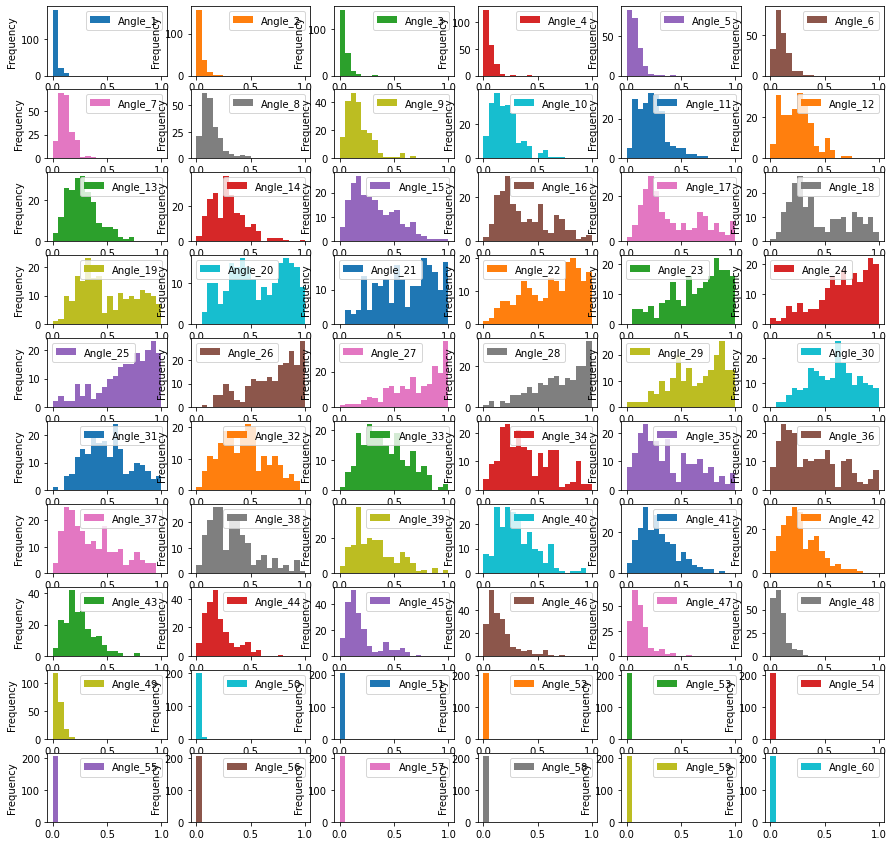

In [10]:
df.plot(kind='hist', subplots=True, layout=(10,6), sharex=False,bins = 20, figsize=(15,15))
plt.show()

**Analysis : It is observed that some features have gaussian distribution and some have exponential distribution.**

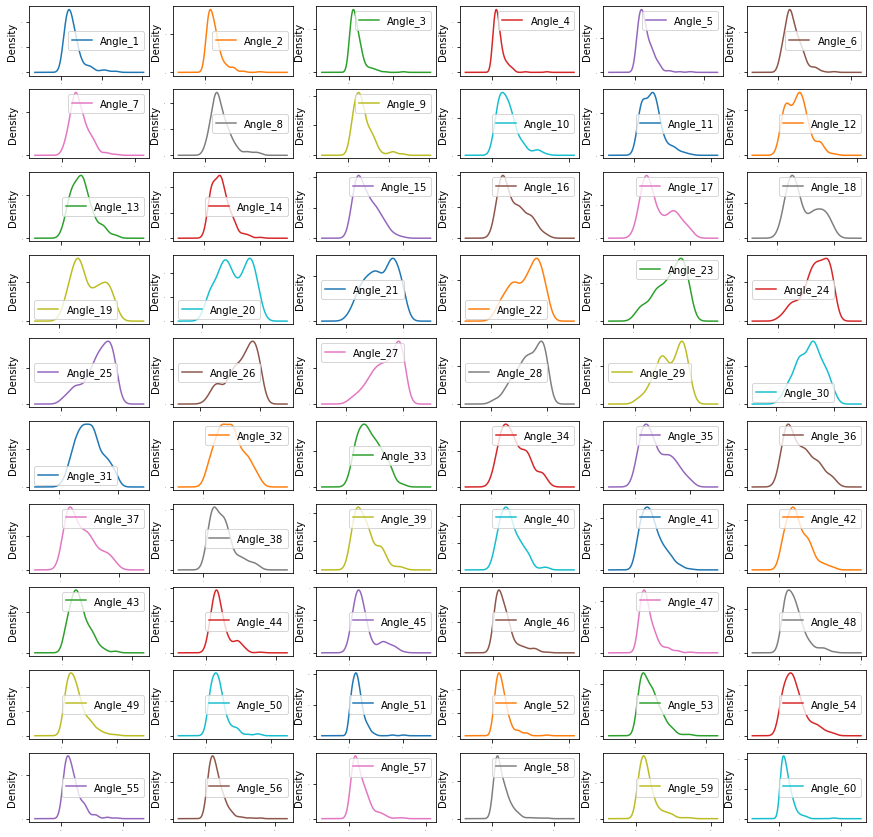

In [11]:
# Unimodal Density Visualization
df.plot(kind='density', subplots=True, sharex=False, sharey=False, layout=(10,6) ,fontsize=1,figsize=(15,15))
plt.show()

**Analysis : It is observed that many of the features have skewed distribution.**

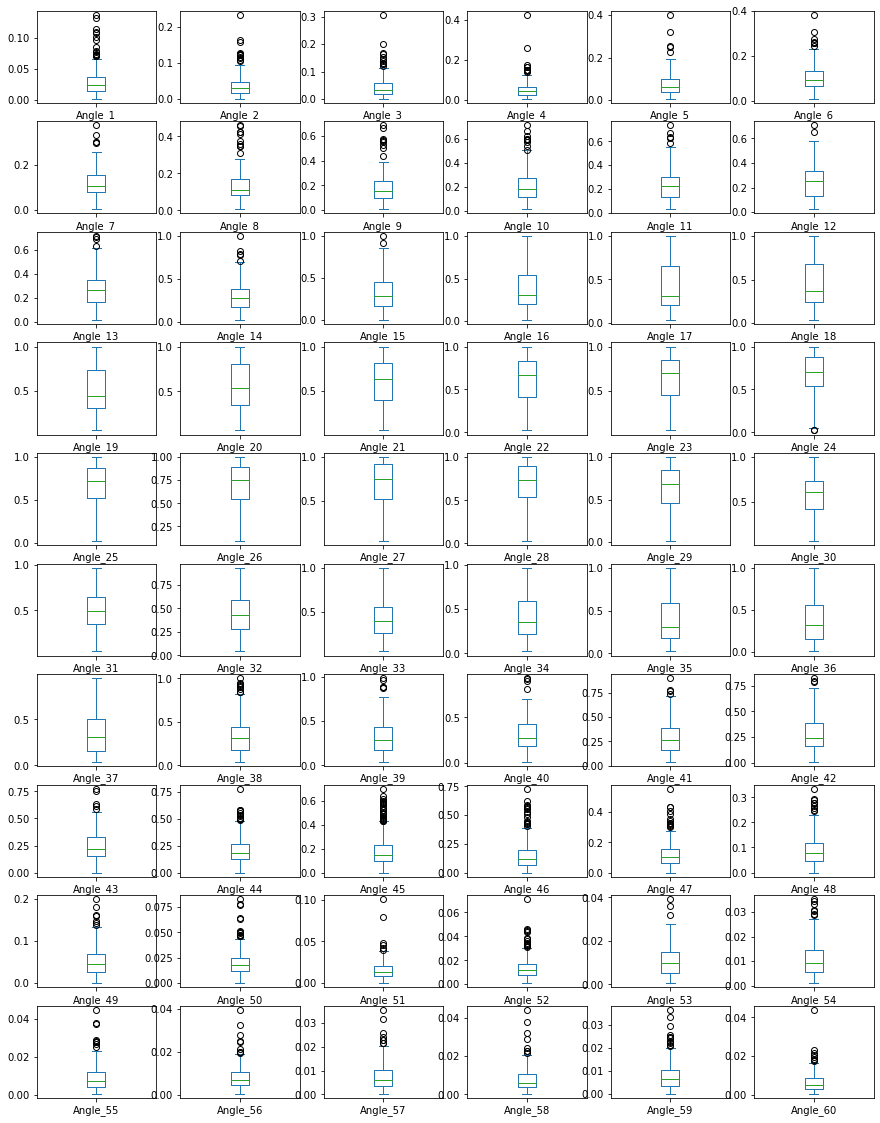

In [12]:
df.plot(kind='box', subplots=True, layout=(10,6), sharex=False, figsize=(15,20))
plt.show()

 2. Multivariate plots to better understand the relationships between attributes

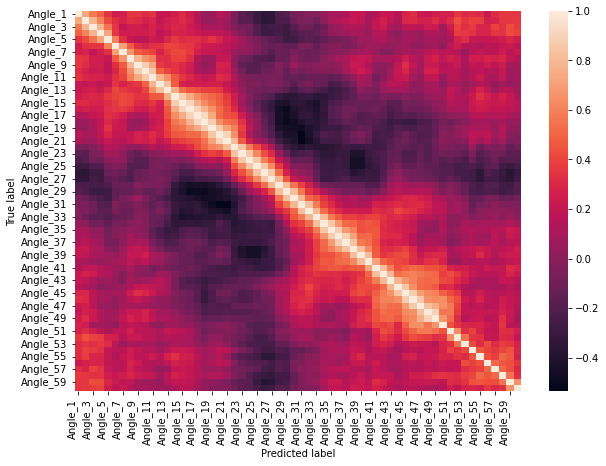

In [13]:
plt.figure(figsize=(10, 7))
hmap = sns.heatmap(df.corr())
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=90, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

**Analysis : It looks like there is also some structure in the order of the attributes. The red around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The dark red patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.**

**So some thoughts of what we can play around with later is:**
* Standardising the data
* Transforming it
* Thinning out highly correlated variables

## Prepare Data, Reduce Demontionality, and Evaluate Algorithms

Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

Defining test options such as cross validation and the evaluation metric to use.
Spot checking a suite of linear and nonlinear machine learning algorithms.
Comparing the estimated accuracy of algorithms.
For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

* Linear Algorithm: Linear Regression, Logistic Regression

* Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

* Ensemble Algorithms: Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

In [14]:
# Encode M and R with 1 and 0
df['Result'].replace('M', 1, inplace=True)
df['Result'].replace('R', 0, inplace=True)
df.groupby('Result').size() 

arr = df.values
X = arr[:,0:60]
y = arr[:,60]

This dataset does not contains any missing value and has all the features in numeric form. So, we just only need to find the relevant features. I have used **principal component analysis (pca)** for removing correlation among the features and reducing the dimension.

In [15]:
def Get_Accuracy(model, x_,y_, num_com):
        pca = PCA(n_components=num_com)
        #pca.fit(x)
        x_reduced = pca.fit_transform(x_)
        pca_var = sum(pca.explained_variance_ratio_)

        ##Splitting training and test data
        x_train, x_test, y_train, y_test = train_test_split(x_reduced, y_, test_size = 0.2, shuffle = True)

        model.fit(x_train, y_train)
        test_acc = model.score(x_test, y_test)
        #print(test_accuracy)
        return [pca_var, test_acc]

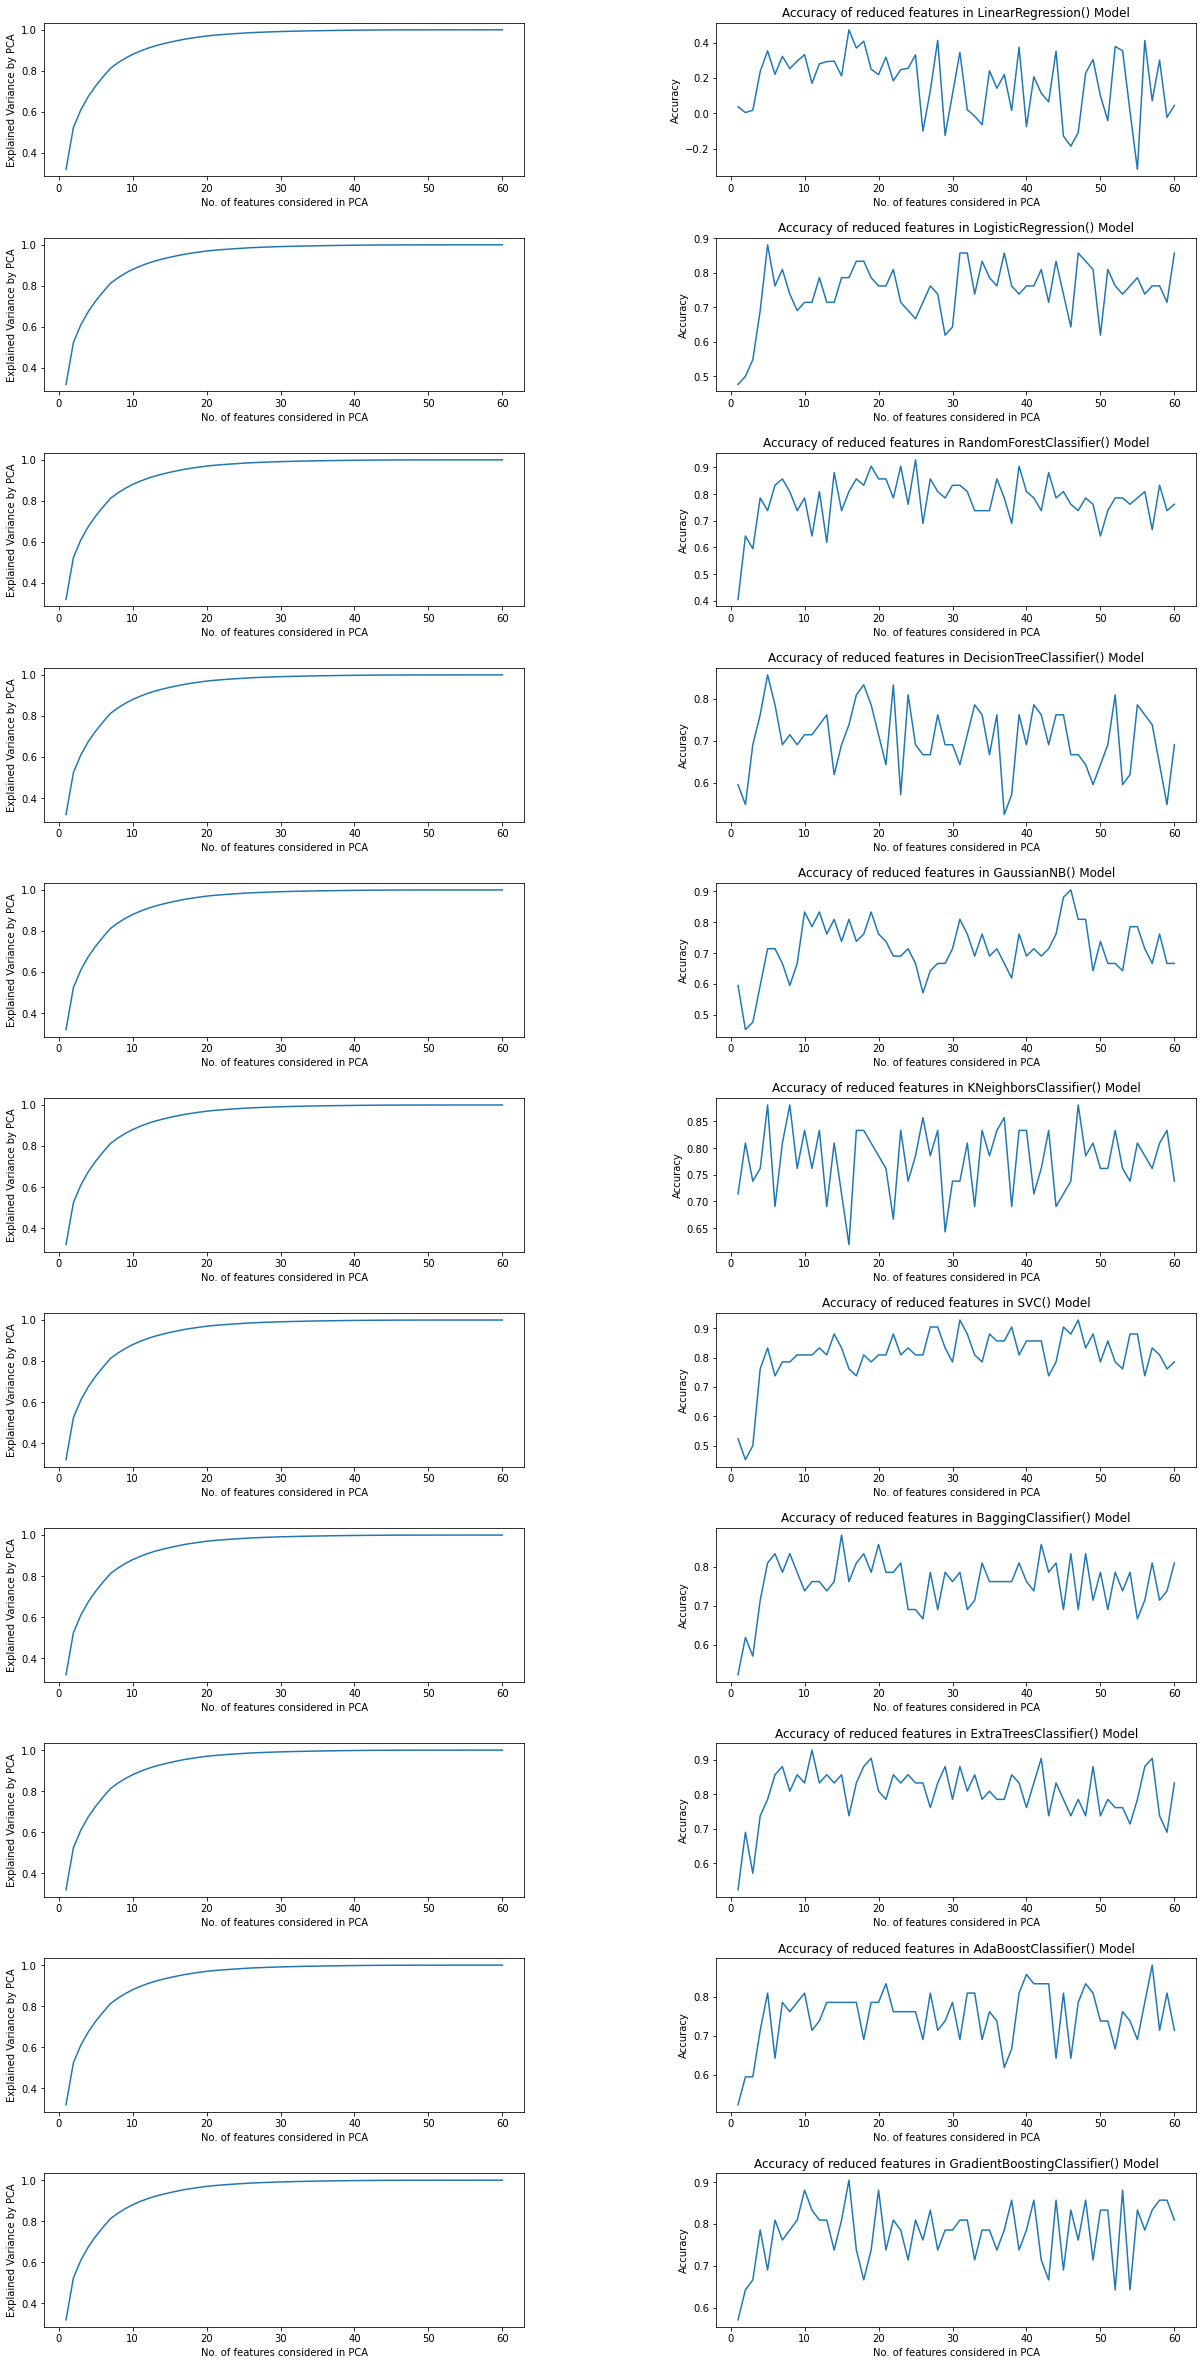

In [16]:
models = [LinearRegression(), 
          LogisticRegression(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          KNeighborsClassifier(),
          SVC(),
          BaggingClassifier(),
          ExtraTreesClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier()] 

    
nb=0

fig1 = plt.figure(figsize=(20,40))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for model in models:
    pca_var_  = []
    test_acc_ = []
    for i in range(1,61):
        pca_var,test_acc= Get_Accuracy(model,X,y,i)
        pca_var_.append(pca_var)
        test_acc_.append(test_acc)
    
    nb+=1
    plt.subplot(11,2,nb)
    p = [i for i in range(1,61)]
    plt.plot(p,pca_var_)
    plt.xlabel("No. of features considered in PCA")
    plt.ylabel("Explained Variance by PCA")
#     plt.show()
    
    nb+=1
    plt.subplot(11,2,nb)
    plt.plot(p,test_acc_)
    plt.xlabel("No. of features considered in PCA")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy of reduced features in {model} Model")
plt.show()

**Analysis:** There is one intresting observayion from the above accuracy Vs number of pca features graph, RandomForestClassifier (an ensemble model) and ExtraTreeClassifier outperform SVC when the number of pca components are low (<10). However, all of these models have nearly the same performance when number of pca components are increased.

## Finalize Model

Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:

* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

In [17]:
def Final_model(model, x_,y_, num_com):
        pca = PCA(n_components=num_com)
        x_reduced = pca.fit_transform(x_)
        pca_var = sum(pca.explained_variance_ratio_)
        
        x_train, x_test, y_train, y_test = train_test_split(x_reduced, y_, test_size = 0.2, shuffle = True)

        model= model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        Prediction_=[]
        for itm in y:
            if itm>0.5:
                Prediction_.append("Mine")
            else:
                Prediction_.append("Rock")
                
        print('Test Accuracy: ', accuracy_score(y_test, predictions) * 100, '\n')
        print('Confusion Matrix : \n',confusion_matrix(y_test, predictions), '\n')
        print('Classification Report : \n ',classification_report(y_test, predictions), '\n')
        print(y, '\n',Prediction_)
        
        return model, x_test

In [40]:
model1, x_test= Final_model(RandomForestClassifier(),X,y,10)

Test Accuracy:  92.85714285714286 

Confusion Matrix : 
 [[21  1]
 [ 2 18]] 

Classification Report : 
                precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        22
         1.0       0.95      0.90      0.92        20

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42
 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [41]:
model2= Final_model(ExtraTreesClassifier(),X,y,10)

Test Accuracy:  90.47619047619048 

Confusion Matrix : 
 [[16  1]
 [ 3 22]] 

Classification Report : 
                precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        17
         1.0       0.96      0.88      0.92        25

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42
 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

Analysis: It is observed that we achieve an accuracy of nearly 93% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of ExtraTreesClassifier.

#### Save model for later use

In [42]:
pickle5.dump(model2, open('../Sonar-Mines-Rocks/models/model.pkl','wb'))
model = pickle5.load(open('../Sonar-Mines-Rocks/models/model.pkl','rb'))


# joblib.dump(finalModel, '../Sonar-Mines-Rocks/Sonar_Mines_vs_Rocks.sav')
# # Some time later..load the saved model and check prediction:
# model = joblib.load('Sonar_Mines_vs_Rocks.sav')
# model= model.predict(X_test) 
# print('Accuracy: ', accuracy_score(Y_test, model) * 100)